## Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Create Data

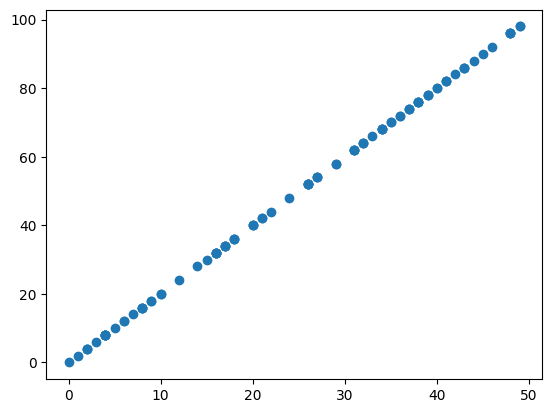

In [ ]:
# define x and y (without noise)
true_w1 = 2
x = np.random.randint(0, 50, 100)
y = true_w1 * x
plt.scatter(x, y)
plt.show()

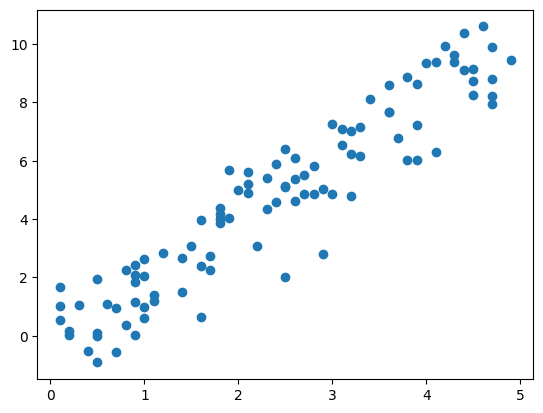

In [ ]:
# define x and y (with noise)
true_w1 = 2
x = np.random.randint(0, 50, 100) / 10
y = true_w1 * x + np.random.normal(0, 1, 100)
plt.scatter(x, y)
plt.show()

Plot scattered data and fake line.


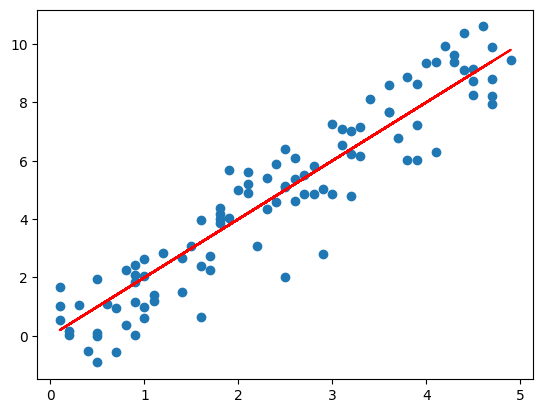

In [ ]:
#@title Set Arguments

w1 = 2 #@param {type:"slider", min:-10, max:10, step:0.1}

print(f'Plot scattered data and fake line.')
plt.scatter(x, y)
plt.plot(x, x*w1, 'red')
plt.show()

## Gradient of a line

If the model takes the form
$$y = wx + \epsilon$$
and the loss function is
$$\text{MSE} = \frac{1}{n} \sum_i (y - \hat{y}_i)^2$$
with $n$ samples, then we can write
$$
\begin{array}[cccc]\
\frac{\partial}{\partial w_1} \frac{1}{n} \sum_i (y - w_1 \cdot x)^2
&=& \frac{2}{n} \sum_i (y - w_1 \cdot x)(-x) \\
&=& -\frac{2}{n} \sum_i (y - w_1 x) (x) \\
\end{array}
$$

Plot scattered data and fake line.


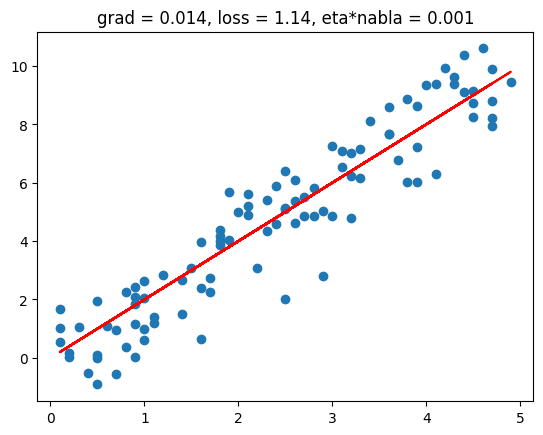

In [ ]:
#@title Set Arguments

eta = 0.0585 #@param {type:"slider", min:0, max:0.1, step:0.00001}
w1 = 2 #@param {type:"slider", min:-10, max:10, step:0.1}
nabla = 2 * np.round(np.mean(((y - x*w1) * x)), 3)
loss = np.round(np.mean((y - x*w1)**2), 2)
delta = np.round(eta * nabla, 3)

print(f'Plot scattered data and fake line.')
plt.scatter(x, y)
plt.plot(x, x*w1, 'red')
plt.title(f'grad = {nabla}, loss = {loss}, eta*nabla = {delta}')
plt.show()

## Use `tensorflow`

Note that we have to drag the progress bar left and right to find the optimal spot and this is for one parameter only. One can imagine that things get much more complicated when there are millions of parameters.

But no worries, neual network does it for us.

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential(name='toy_model')
model.add(tf.keras.layers.Dense(units=1, activation=None, use_bias=False, input_shape=[1], name='layer1'))

In [ ]:
model.summary()

Model: "toy_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='mse')

In [ ]:
model.fit(x=x, y=y, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 10ms/step - loss: 37.5087
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 9.4580
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 3.9261
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0487
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 1.4627
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 1.2746
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 1.1927
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 1.1730
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 1.1471
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 1.1404


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
yhat = model.predict(x).reshape(-1)
yhat.shape

4/4 [==============================] - 0s 7ms/step


(100,)

In [ ]:
mean_absolute_error(y, yhat)

0.8644822295463744

Plot scattered data and fake line.


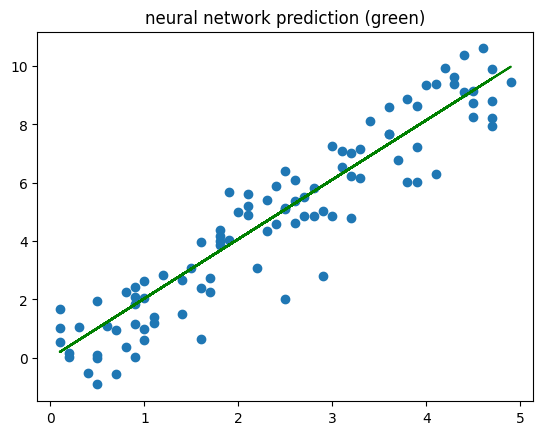

In [ ]:
print(f'Plot scattered data and fake line.')
plt.scatter(x, y)
plt.plot(x, yhat, 'green')
plt.title(f'neural network prediction (green)')
plt.show()

How to access the weights? We use `model.weights`.

In [ ]:
model.weights

[<tf.Variable 'layer1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.0356944]], dtype=float32)>]

This is a list because it has `[]` around it. To retrieve the content, we use `[0]`. Then we convert it into `numpy` array by adding `.numpy()` behind it.

In [ ]:
model.weights[0].numpy()

array([[2.0356944]], dtype=float32)

Hence, we know that there is one parameter and the numerical value is presented.

## Create animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import imageio.v2 as iio
import os

# Generate random data
np.random.seed(42)
X = np.random.rand(100, 1)
noise = np.random.normal(0, 0.1, X.shape)
y = 2 * X + 3 + noise

# Define the MSE loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Compute the gradient of the loss with respect to w and b
def compute_gradient(X, y, w, b):
    y_pred = w * X + b
    error = y_pred - y
    grad_w = 2 * np.mean(error * X)
    grad_b = 2 * np.mean(error)
    return grad_w, grad_b

# Train the model using gradient descent
def train(X, y, learning_rate=0.1, n_iterations=300):
    w, b = np.random.randn(), np.random.randn()
    ws, bs, losses = [], [], []
    for i in tqdm(range(n_iterations)):
        y_pred = w * X + b
        loss = mse_loss(y, y_pred)
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update parameters
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        ws.append(w)
        bs.append(b)
        losses.append(loss)

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(X, y, color='blue')
        plt.plot(X, w * X + b, color='red')
        plt.title(f'Iteration {i+1}: Line of fit (by y = 2X + 3 + noise)')
        plt.subplot(1, 2, 2)
        plt.plot(range(i+1), losses, color='green')
        plt.title(f'w={np.round(w, 2)}, b={np.round(b, 2)}, and min loss (every iter.) = {np.round(min(losses), 3)}')
        plt.tight_layout()

        if not os.path.exists('./output'):
            os.makedirs('./output')
        plt.savefig(f'./output/img_{i}.png', transparent=False, facecolor='white')
        plt.close()

    return ws, bs, losses

In [ ]:
# Run the training
ws, bs, losses = train(X, y)

100%|██████████| 300/300 [02:05<00:00,  2.40it/s]


In [ ]:
# Create a GIF from the saved PNG files
frames = []
for i in tqdm(range(len(ws))):
    image = iio.imread(f'./output/img_{i}.png')
    frames.append(image)

iio.mimsave('./training_animation.gif', frames, fps=5)

100%|██████████| 300/300 [00:03<00:00, 96.24it/s]
